# Unit 6: Unsupervised Data Mining Methods

## Lab Objective
To apply unsupervised learning techniques like **clustering** and **association rule mining**.

## Background Theory

### Association Rules
Discovering interesting relationships among items in large datasets.
- **Apriori Algorithm**: A classic algorithm for mining frequent itemsets and generating association rules
- **Interestingness Measures**:
  - **Support**: Frequency of itemset in dataset → $Support(A) = \frac{|transactions\ containing\ A|}{|total\ transactions|}$
  - **Confidence**: How often the rule is true → $Confidence(A \rightarrow B) = \frac{Support(A \cup B)}{Support(A)}$
  - **Lift**: Strength of rule over random co-occurrence → $Lift(A \rightarrow B) = \frac{Confidence(A \rightarrow B)}{Support(B)}$

### Clustering
Grouping data points based on similarity without predefined labels.
- **K-Means**: Partitioning method minimizing within-cluster variance
- **K-Medoids**: Similar to K-Means but uses actual data points as centers
- **DBSCAN**: Density-based clustering that finds arbitrarily shaped clusters
- **Expectation Maximization (EM)**: Probabilistic clustering using Gaussian Mixture Models
- **Hierarchical Clustering**: Agglomerative (bottom-up) and Divisive (top-down)

### Cluster Validation
- **Intrinsic (Internal)**: Silhouette Score - measures how similar objects are to their own cluster
- **Extrinsic (External)**: Adjusted Rand Index - compares clustering with ground truth

## Part 1: Import Required Libraries

In [1]:
# Install required packages (uncomment if needed)
!pip install "numpy<2.0.0" mlxtend scikit-learn pandas matplotlib seaborn scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 14.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 80.0 MB/s eta 0:00:00
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=1959524 sha256=5ca6ee1eced1219dad608ac5af088fb6cdd0a4746980d8fe181fb10364818639
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the f

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Association Rule Mining
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids

# Preprocessing and Metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.datasets import make_blobs, load_iris

# Visualization
from scipy.cluster.hierarchy import dendrogram, linkage

print("All libraries imported successfully!")

/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):
/usr/local/lib/python3.12/dist-packages/sklearn_extra/cluster/_commonnn.py:18: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) < LooseVersion("0.23.0"):
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


All libraries imported successfully!


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

---
## Part 2: Association Rule Mining with Apriori Algorithm

### What is Association Rule Mining?
Association rule mining finds interesting relationships between variables in large databases. The classic example is **Market Basket Analysis** - finding which products are frequently bought together.

### The Apriori Algorithm
The Apriori algorithm uses a "bottom-up" approach where frequent subsets are extended one item at a time (candidate generation), and groups of candidates are tested against the data.

In [2]:
# Create a sample transaction dataset (Market Basket Data)
transactions = [
    ['Milk', 'Bread', 'Butter'],
    ['Milk', 'Bread'],
    ['Milk', 'Diapers', 'Beer', 'Eggs'],
    ['Bread', 'Butter', 'Diapers', 'Beer'],
    ['Milk', 'Bread', 'Butter', 'Diapers'],
    ['Milk', 'Bread', 'Butter', 'Beer'],
    ['Milk', 'Diapers', 'Beer'],
    ['Bread', 'Butter', 'Diapers'],
    ['Milk', 'Bread', 'Diapers', 'Eggs'],
    ['Milk', 'Bread', 'Butter', 'Eggs'],
]

# Display transactions
print("Transaction Dataset:")
for i, t in enumerate(transactions, 1):
    print(f"Transaction {i}: {t}")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Transaction Dataset:
Transaction 1: ['Milk', 'Bread', 'Butter']
Transaction 2: ['Milk', 'Bread']
Transaction 3: ['Milk', 'Diapers', 'Beer', 'Eggs']
Transaction 4: ['Bread', 'Butter', 'Diapers', 'Beer']
Transaction 5: ['Milk', 'Bread', 'Butter', 'Diapers']
Transaction 6: ['Milk', 'Bread', 'Butter', 'Beer']
Transaction 7: ['Milk', 'Diapers', 'Beer']
Transaction 8: ['Bread', 'Butter', 'Diapers']
Transaction 9: ['Milk', 'Bread', 'Diapers', 'Eggs']
Transaction 10: ['Milk', 'Bread', 'Butter', 'Eggs']


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [3]:
# Convert transactions to one-hot encoded DataFrame using TransactionEncoder
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_transactions = pd.DataFrame(te_array, columns=te.columns_)

print("One-Hot Encoded Transaction Matrix:")
df_transactions

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

One-Hot Encoded Transaction Matrix:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Beer  Bread  Butter  Diapers   Eggs   Milk
0  False   True    True    False  False   True
1  False   True   False    False  False   True
2   True  False   False     True   True   True
3   True   True    True     True  False  False
4  False   True    True     True  False   True
5   True   True    True    False  False   True
6   True  False   False     True  False   True
7  False   True    True     True  False  False
8  False   True   False     True   True   True
9  False   True    True    False   True   True

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [4]:
# Apply Apriori Algorithm to find frequent itemsets
# min_support = 0.3 means itemset must appear in at least 30% of transactions
frequent_itemsets = apriori(df_transactions, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

print("Frequent Itemsets (min_support=0.3):")
print(f"Total frequent itemsets found: {len(frequent_itemsets)}\n")
frequent_itemsets.sort_values('support', ascending=False)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Frequent Itemsets (min_support=0.3):
Total frequent itemsets found: 17



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


support                  itemsets  length
5       0.8                    (Milk)       1
1       0.8                   (Bread)       1
8       0.6           (Butter, Bread)       2
2       0.6                  (Butter)       1
3       0.6                 (Diapers)       1
10      0.6             (Bread, Milk)       2
9       0.4          (Diapers, Bread)       2
13      0.4           (Diapers, Milk)       2
12      0.4            (Butter, Milk)       2
0       0.4                    (Beer)       1
16      0.4     (Butter, Bread, Milk)       3
7       0.3              (Beer, Milk)       2
11      0.3         (Diapers, Butter)       2
6       0.3           (Diapers, Beer)       2
4       0.3                    (Eggs)       1
14      0.3              (Eggs, Milk)       2
15      0.3  (Diapers, Butter, Bread)       3

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [5]:
# Generate Association Rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("Association Rules (min_confidence=0.5):")
print(f"Total rules generated: {len(rules)}\n")

# Display important columns
rules_display = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(3)
rules_display.sort_values('lift', ascending=False)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Association Rules (min_confidence=0.5):
Total rules generated: 27



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

antecedents       consequents  support  confidence   lift
0           (Diapers)            (Beer)      0.3       0.500  1.250
22     (Butter, Milk)           (Bread)      0.4       1.000  1.250
16  (Diapers, Butter)           (Bread)      0.3       1.000  1.250
15             (Eggs)            (Milk)      0.3       1.000  1.250
1              (Beer)         (Diapers)      0.3       0.750  1.250
20           (Butter)  (Diapers, Bread)      0.3       0.500  1.250
17   (Diapers, Bread)          (Butter)      0.3       0.750  1.250
25            (Bread)    (Butter, Milk)      0.4       0.500  1.250
4             (Bread)          (Butter)      0.6       0.750  1.250
3            (Butter)           (Bread)      0.6       1.000  1.250
24           (Butter)     (Bread, Milk)      0.4       0.667  1.111
23      (Bread, Milk)          (Butter)      0.4       0.667  1.111
7             (Bread)            (Milk)      0.6       0.750  0.937
8              (Milk)           (Bread)      0.6       0.750  0.937
2              (Beer)            (Milk)      0.3       0.750  0.937
18    (Butter, Bread)         (Diapers)      0.3       0.500  0.833
21    (Butter, Bread)            (Milk)      0.4       0.667  0.833
19          (Diapers)   (Butter, Bread)      0.3       0.500  0.833
13          (Diapers)            (Milk)      0.4       0.667  0.833
14             (Milk)         (Diapers)      0.4       0.500  0.833
12             (Milk)          (Butter)      0.4       0.500  0.833
11           (Butter)            (Milk)      0.4       0.667  0.833
10           (Butter)         (Diapers)      0.3       0.500  0.833
9           (Diapers)          (Butter)      0.3       0.500  0.833
6             (Bread)         (Diapers)      0.4       0.500  0.833
5           (Diapers)           (Bread)      0.4       0.667  0.833
26             (Milk)   (Butter, Bread)      0.4       0.500  0.833

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [6]:
# Interpret the rules
print("=" * 60)
print("INTERPRETATION OF TOP ASSOCIATION RULES")
print("=" * 60)

top_rules = rules.nlargest(5, 'lift')
for idx, row in top_rules.iterrows():
    antecedent = ', '.join(list(row['antecedents']))
    consequent = ', '.join(list(row['consequents']))
    print(f"\nRule: {antecedent} → {consequent}")
    print(f"  Support: {row['support']:.2%} (appears in {row['support']*100:.0f}% of transactions)")
    print(f"  Confidence: {row['confidence']:.2%} (when {antecedent} is bought, {row['confidence']*100:.0f}% also buy {consequent})")
    print(f"  Lift: {row['lift']:.2f} (>{1} means positive association)")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

INTERPRETATION OF TOP ASSOCIATION RULES

Rule: Diapers → Beer
  Support: 30.00% (appears in 30% of transactions)
  Confidence: 50.00% (when Diapers is bought, 50% also buy Beer)
  Lift: 1.25 (>1 means positive association)

Rule: Butter → Bread
  Support: 60.00% (appears in 60% of transactions)
  Confidence: 100.00% (when Butter is bought, 100% also buy Bread)
  Lift: 1.25 (>1 means positive association)

Rule: Eggs → Milk
  Support: 30.00% (appears in 30% of transactions)
  Confidence: 100.00% (when Eggs is bought, 100% also buy Milk)
  Lift: 1.25 (>1 means positive association)

Rule: Diapers, Butter → Bread
  Support: 30.00% (appears in 30% of transactions)
  Confidence: 100.00% (when Diapers, Butter is bought, 100% also buy Bread)
  Lift: 1.25 (>1 means positive association)

Rule: Butter → Diapers, Bread
  Support: 30.00% (appears in 30% of transactions)
  Confidence: 50.00% (when Butter is bought, 50% also buy Diapers, Bread)
  Lift: 1.25 (>1 means positive association)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

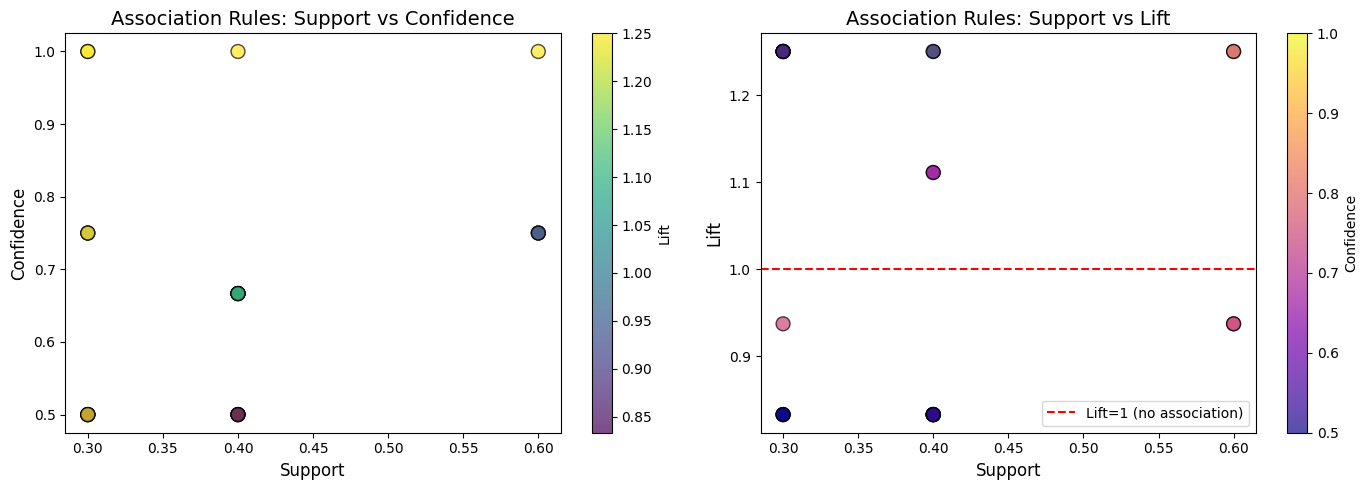

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [7]:
# Visualize Association Rules - Support vs Confidence colored by Lift
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Support vs Confidence
scatter1 = axes[0].scatter(rules['support'], rules['confidence'],
                           c=rules['lift'], cmap='viridis', s=100, alpha=0.7, edgecolors='black')
axes[0].set_xlabel('Support', fontsize=12)
axes[0].set_ylabel('Confidence', fontsize=12)
axes[0].set_title('Association Rules: Support vs Confidence', fontsize=14)
plt.colorbar(scatter1, ax=axes[0], label='Lift')

# Plot 2: Support vs Lift
scatter2 = axes[1].scatter(rules['support'], rules['lift'],
                           c=rules['confidence'], cmap='plasma', s=100, alpha=0.7, edgecolors='black')
axes[1].set_xlabel('Support', fontsize=12)
axes[1].set_ylabel('Lift', fontsize=12)
axes[1].set_title('Association Rules: Support vs Lift', fontsize=14)
axes[1].axhline(y=1, color='red', linestyle='--', label='Lift=1 (no association)')
axes[1].legend()
plt.colorbar(scatter2, ax=axes[1], label='Confidence')

plt.tight_layout()
plt.show()

---
## Part 3: Clustering Methods

### 3.1 Create Sample Dataset for Clustering
We'll create a synthetic dataset with known clusters to demonstrate various clustering algorithms.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

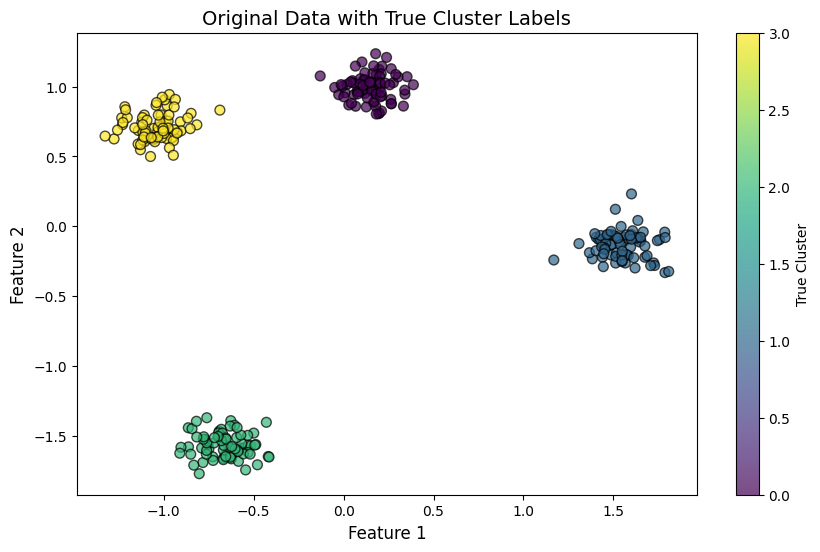

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Dataset shape: (300, 2)
Number of true clusters: 4


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [8]:
# Create synthetic dataset with 4 clusters
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create DataFrame
df_cluster = pd.DataFrame(X_scaled, columns=['Feature_1', 'Feature_2'])
df_cluster['True_Label'] = y_true

# Visualize the original data with true labels
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Original Data with True Cluster Labels', fontsize=14)
plt.colorbar(scatter, label='True Cluster')
plt.show()

print(f"Dataset shape: {X_scaled.shape}")
print(f"Number of true clusters: {len(np.unique(y_true))}")

### 3.2 K-Means Clustering

**K-Means** is a centroid-based algorithm that partitions data into K clusters by:
1. Initializing K centroids randomly
2. Assigning each point to the nearest centroid
3. Updating centroids as the mean of assigned points
4. Repeating until convergence

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

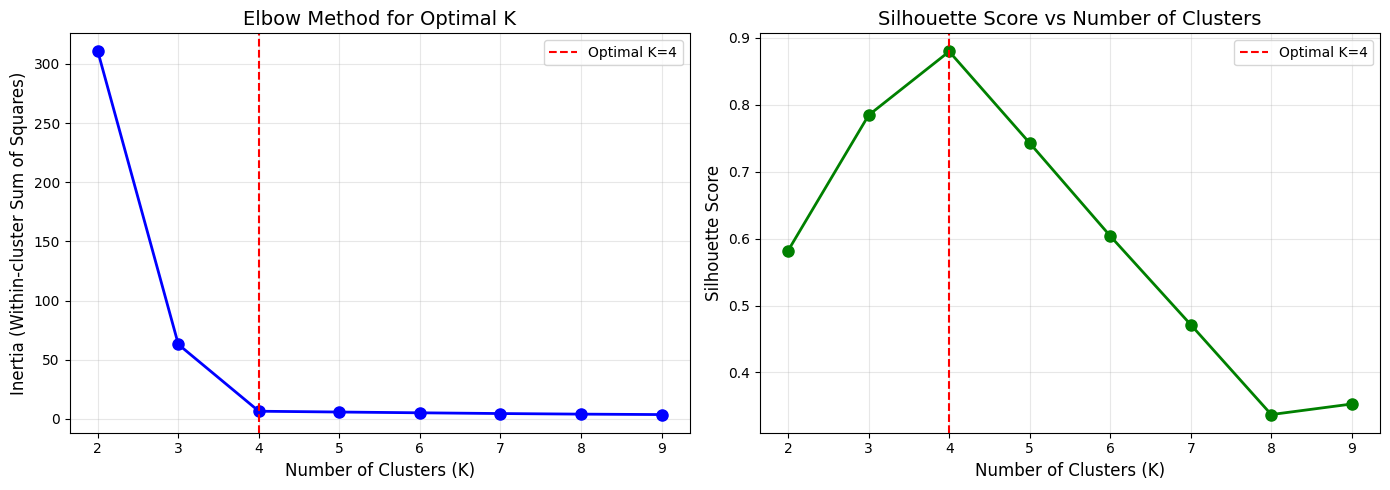

Best K by Silhouette Score: 4 (Score: 0.880)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [9]:
# Finding optimal K using Elbow Method and Silhouette Score
K_range = range(2, 10)
inertias = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow Method
axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal K', fontsize=14)
axes[0].axvline(x=4, color='red', linestyle='--', label='Optimal K=4')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silhouette Score
axes[1].plot(K_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs Number of Clusters', fontsize=14)
axes[1].axvline(x=4, color='red', linestyle='--', label='Optimal K=4')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Best K by Silhouette Score: {K_range[np.argmax(silhouette_scores)]} (Score: {max(silhouette_scores):.3f})")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

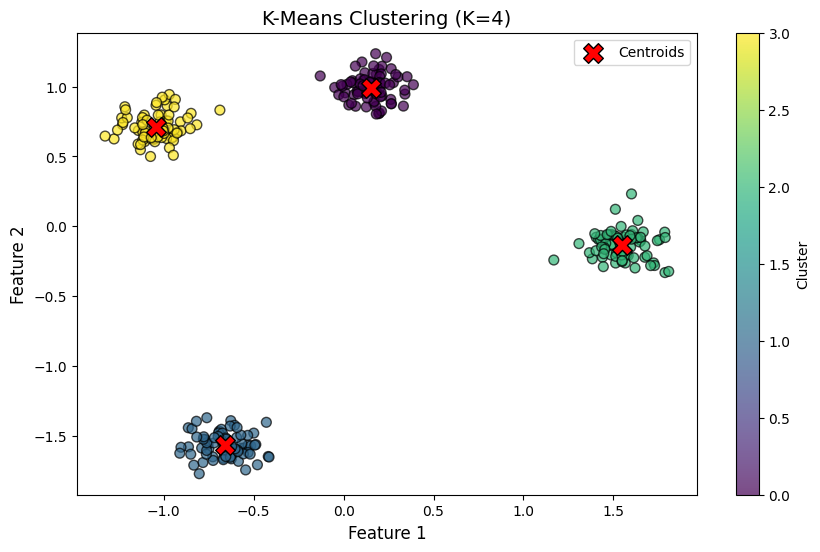

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


K-Means Silhouette Score: 0.880
K-Means Adjusted Rand Index: 1.000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [10]:
# Apply K-Means with optimal K=4
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
kmeans_centroids = kmeans.cluster_centers_

# Visualize K-Means results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=200, edgecolors='black', label='Centroids')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('K-Means Clustering (K=4)', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.show()

# Evaluation metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y_true, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Adjusted Rand Index: {kmeans_ari:.3f}")

### 3.3 K-Medoids Clustering

**K-Medoids** is similar to K-Means but uses actual data points (medoids) as cluster centers instead of means. This makes it more robust to outliers.

In [11]:
# Apply K-Medoids clustering
# Note: If sklearn_extra is not installed, use: pip install scikit-learn-extra
try:
    kmedoids = KMedoids(n_clusters=4, random_state=42)
    kmedoids_labels = kmedoids.fit_predict(X_scaled)
    kmedoids_medoids = kmedoids.cluster_centers_

    # Visualize K-Medoids results
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
    plt.scatter(kmedoids_medoids[:, 0], kmedoids_medoids[:, 1], c='red', marker='D', s=200, edgecolors='black', label='Medoids')
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title('K-Medoids Clustering (K=4)', fontsize=14)
    plt.colorbar(scatter, label='Cluster')
    plt.legend()
    plt.show()

    # Evaluation metrics
    kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
    kmedoids_ari = adjusted_rand_score(y_true, kmedoids_labels)
    print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.3f}")
    print(f"K-Medoids Adjusted Rand Index: {kmedoids_ari:.3f}")
except ImportError:
    print("sklearn_extra not installed. Install with: pip install scikit-learn-extra")
    kmedoids_labels = None

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


K-Medoids Silhouette Score: 0.880
K-Medoids Adjusted Rand Index: 1.000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

### 3.4 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

**DBSCAN** groups together points that are closely packed and marks points in low-density regions as outliers.
- **eps**: Maximum distance between two samples to be considered neighbors
- **min_samples**: Minimum number of samples in a neighborhood to form a core point

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

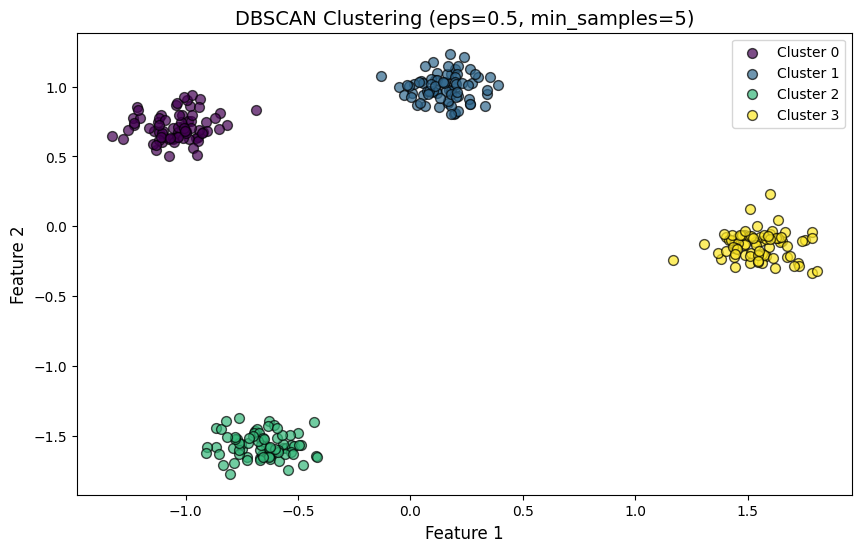

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Number of clusters found: 4
Number of noise points: 0
DBSCAN Silhouette Score (excluding noise): 0.880
DBSCAN Adjusted Rand Index: 1.000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [12]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN results
plt.figure(figsize=(10, 6))
# Use different colormap to show noise points (-1) distinctly
unique_labels = set(dbscan_labels)
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise points
        col = 'black'
        marker = 'x'
        label = 'Noise'
    else:
        marker = 'o'
        label = f'Cluster {k}'

    class_mask = (dbscan_labels == k)
    plt.scatter(X_scaled[class_mask, 0], X_scaled[class_mask, 1],
                c=[col], marker=marker, s=50, alpha=0.7, edgecolors='black', label=label)

plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title(f'DBSCAN Clustering (eps=0.5, min_samples=5)', fontsize=14)
plt.legend()
plt.show()

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Evaluation (excluding noise points for silhouette)
if n_clusters > 1:
    mask = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(X_scaled[mask], dbscan_labels[mask])
    dbscan_ari = adjusted_rand_score(y_true, dbscan_labels)
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.3f}")
    print(f"DBSCAN Adjusted Rand Index: {dbscan_ari:.3f}")

### 3.5 Expectation Maximization (EM) - Gaussian Mixture Models

**Gaussian Mixture Models (GMM)** assume data is generated from a mixture of Gaussian distributions. EM algorithm iteratively estimates the parameters of these distributions.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

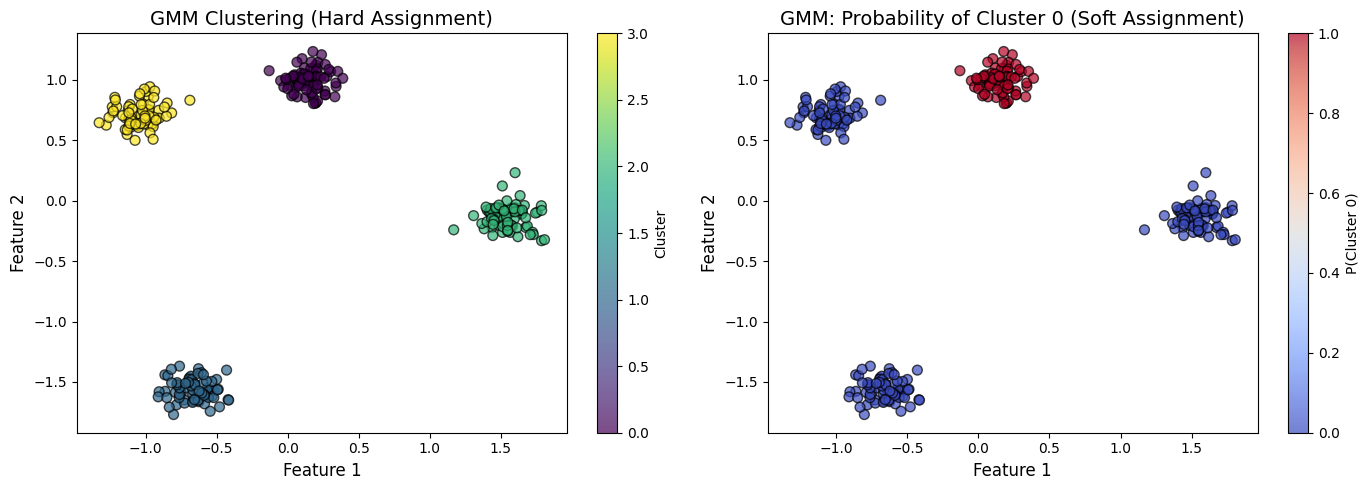

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

GMM Silhouette Score: 0.880
GMM Adjusted Rand Index: 1.000
GMM Log-Likelihood: 0.339


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [13]:
# Apply Gaussian Mixture Model (EM algorithm)
gmm = GaussianMixture(n_components=4, random_state=42, covariance_type='full')
gmm_labels = gmm.fit_predict(X_scaled)
gmm_probs = gmm.predict_proba(X_scaled)

# Visualize GMM results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Hard cluster assignments
scatter1 = axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].set_title('GMM Clustering (Hard Assignment)', fontsize=14)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Plot 2: Probability of belonging to cluster 0 (soft assignment)
scatter2 = axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_probs[:, 0], cmap='coolwarm', s=50, alpha=0.7, edgecolors='black')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].set_title('GMM: Probability of Cluster 0 (Soft Assignment)', fontsize=14)
plt.colorbar(scatter2, ax=axes[1], label='P(Cluster 0)')

plt.tight_layout()
plt.show()

# Evaluation metrics
gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
gmm_ari = adjusted_rand_score(y_true, gmm_labels)
print(f"GMM Silhouette Score: {gmm_silhouette:.3f}")
print(f"GMM Adjusted Rand Index: {gmm_ari:.3f}")
print(f"GMM Log-Likelihood: {gmm.score(X_scaled):.3f}")

### 3.6 Hierarchical Clustering (Agglomerative)

**Agglomerative Clustering** is a bottom-up approach:
1. Start with each point as its own cluster
2. Merge the two closest clusters
3. Repeat until desired number of clusters is reached

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

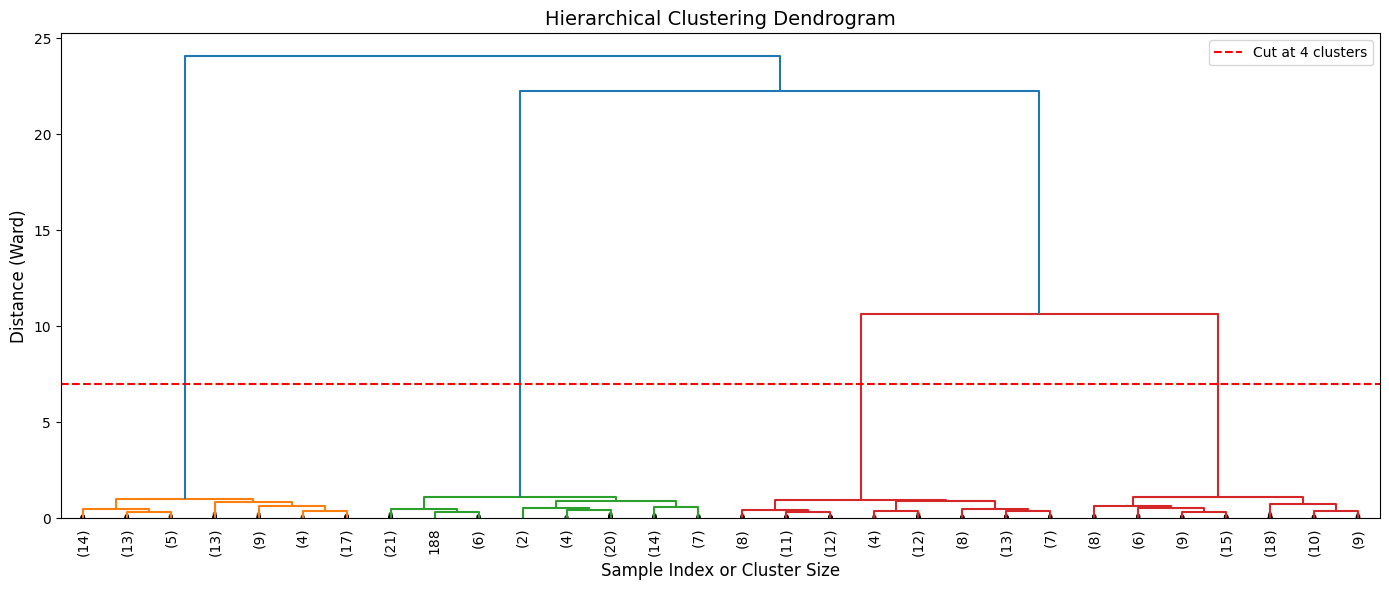

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [14]:
# Create Dendrogram for Hierarchical Clustering
plt.figure(figsize=(14, 6))

# Using Ward's method for linkage
linked = linkage(X_scaled, method='ward')

dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90,
           leaf_font_size=10, show_contracted=True)
plt.xlabel('Sample Index or Cluster Size', fontsize=12)
plt.ylabel('Distance (Ward)', fontsize=12)
plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
plt.axhline(y=7, color='r', linestyle='--', label='Cut at 4 clusters')
plt.legend()
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

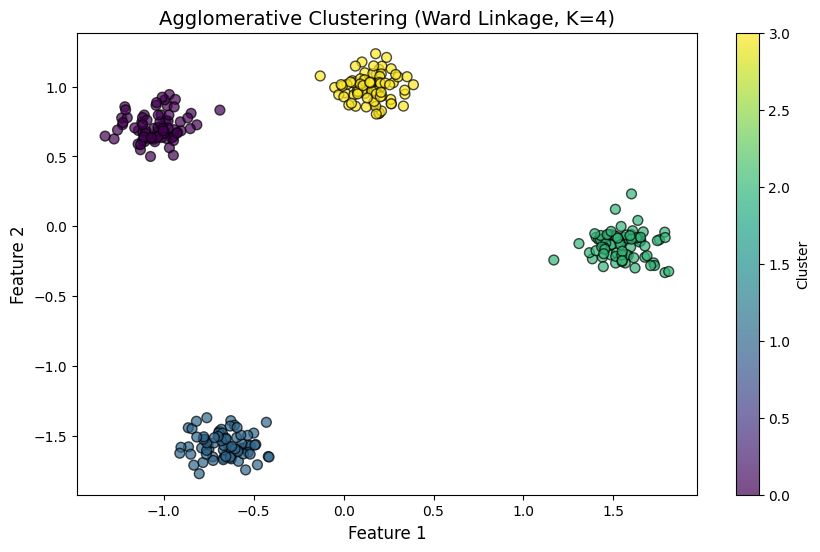

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Agglomerative Silhouette Score: 0.880
Agglomerative Adjusted Rand Index: 1.000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [15]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
agg_labels = agg_clustering.fit_predict(X_scaled)

# Visualize Agglomerative Clustering results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.title('Agglomerative Clustering (Ward Linkage, K=4)', fontsize=14)
plt.colorbar(scatter, label='Cluster')
plt.show()

# Evaluation metrics
agg_silhouette = silhouette_score(X_scaled, agg_labels)
agg_ari = adjusted_rand_score(y_true, agg_labels)
print(f"Agglomerative Silhouette Score: {agg_silhouette:.3f}")
print(f"Agglomerative Adjusted Rand Index: {agg_ari:.3f}")

---
## Part 4: Comparison of All Clustering Methods

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

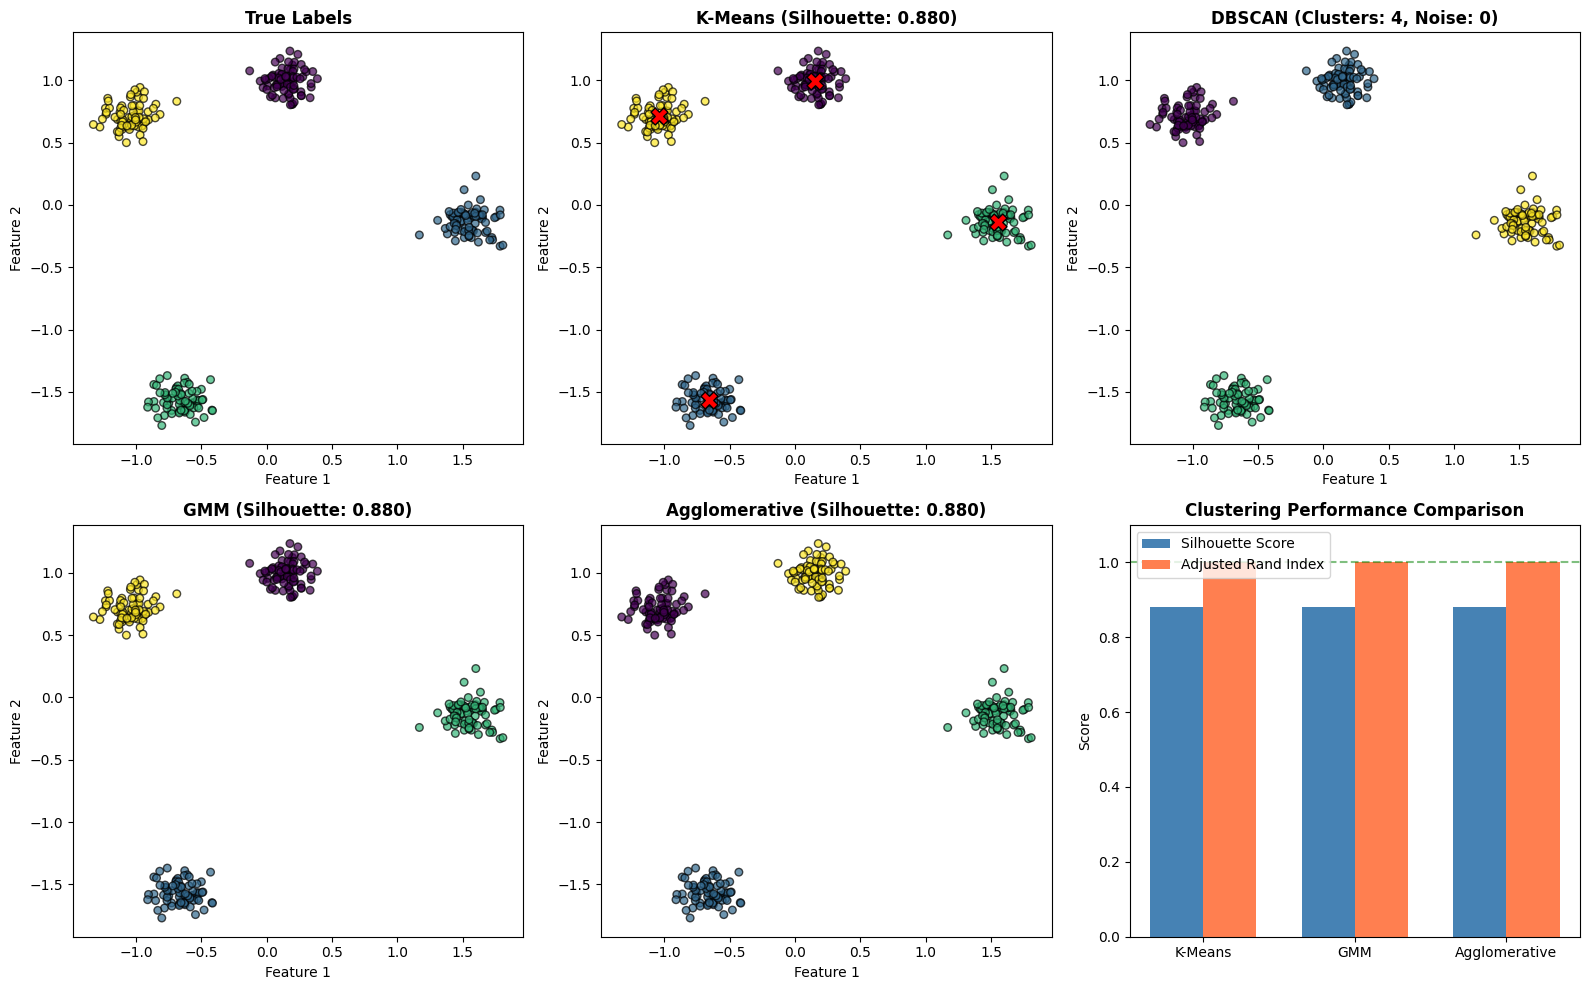

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [16]:
# Visual comparison of all clustering methods
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# True Labels
axes[0, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_true, cmap='viridis', s=30, alpha=0.7, edgecolors='black')
axes[0, 0].set_title('True Labels', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Feature 1')
axes[0, 0].set_ylabel('Feature 2')

# K-Means
axes[0, 1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=30, alpha=0.7, edgecolors='black')
axes[0, 1].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=150, edgecolors='black')
axes[0, 1].set_title(f'K-Means (Silhouette: {kmeans_silhouette:.3f})', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Feature 1')
axes[0, 1].set_ylabel('Feature 2')

# DBSCAN
scatter_dbscan = axes[0, 2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis', s=30, alpha=0.7, edgecolors='black')
axes[0, 2].set_title(f'DBSCAN (Clusters: {n_clusters}, Noise: {n_noise})', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Feature 1')
axes[0, 2].set_ylabel('Feature 2')

# GMM
axes[1, 0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', s=30, alpha=0.7, edgecolors='black')
axes[1, 0].set_title(f'GMM (Silhouette: {gmm_silhouette:.3f})', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Agglomerative
axes[1, 1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis', s=30, alpha=0.7, edgecolors='black')
axes[1, 1].set_title(f'Agglomerative (Silhouette: {agg_silhouette:.3f})', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Summary metrics bar chart
methods = ['K-Means', 'GMM', 'Agglomerative']
silhouettes = [kmeans_silhouette, gmm_silhouette, agg_silhouette]
aris = [kmeans_ari, gmm_ari, agg_ari]

x = np.arange(len(methods))
width = 0.35
bars1 = axes[1, 2].bar(x - width/2, silhouettes, width, label='Silhouette Score', color='steelblue')
bars2 = axes[1, 2].bar(x + width/2, aris, width, label='Adjusted Rand Index', color='coral')
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_title('Clustering Performance Comparison', fontsize=12, fontweight='bold')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(methods)
axes[1, 2].legend()
axes[1, 2].set_ylim(0, 1.1)
axes[1, 2].axhline(y=1, color='green', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [17]:
# Summary Table of All Clustering Methods
summary_data = {
    'Method': ['K-Means', 'DBSCAN', 'GMM (EM)', 'Agglomerative'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette if n_clusters > 1 else 'N/A', gmm_silhouette, agg_silhouette],
    'Adjusted Rand Index': [kmeans_ari, dbscan_ari if n_clusters > 1 else 'N/A', gmm_ari, agg_ari],
    'Pros': [
        'Fast, scalable, simple',
        'Finds arbitrary shapes, handles noise',
        'Soft clustering, probabilistic',
        'No need to specify K beforehand'
    ],
    'Cons': [
        'Sensitive to K, assumes spherical clusters',
        'Sensitive to eps & min_samples',
        'Assumes Gaussian distribution',
        'Computationally expensive for large data'
    ]
}

df_summary = pd.DataFrame(summary_data)
print("=" * 80)
print("CLUSTERING METHODS COMPARISON SUMMARY")
print("=" * 80)
df_summary

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

CLUSTERING METHODS COMPARISON SUMMARY


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Method  Silhouette Score  Adjusted Rand Index  \
0        K-Means          0.879591                  1.0   
1         DBSCAN          0.879591                  1.0   
2       GMM (EM)          0.879591                  1.0   
3  Agglomerative          0.879591                  1.0   

                                    Pros  \
0                 Fast, scalable, simple   
1  Finds arbitrary shapes, handles noise   
2         Soft clustering, probabilistic   
3        No need to specify K beforehand   

                                         Cons  
0  Sensitive to K, assumes spherical clusters  
1              Sensitive to eps & min_samples  
2               Assumes Gaussian distribution  
3    Computationally expensive for large data

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

---
## Part 5: Real-World Dataset Application - Iris Dataset

In [18]:
# Load Iris dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target
feature_names = iris.feature_names

# Standardize features
X_iris_scaled = StandardScaler().fit_transform(X_iris)

# Create DataFrame
df_iris = pd.DataFrame(X_iris, columns=feature_names)
df_iris['Species'] = y_iris

print("Iris Dataset Summary:")
print(f"Shape: {X_iris.shape}")
print(f"Features: {feature_names}")
print(f"Classes: {iris.target_names}")
print("\nFirst 5 rows:")
df_iris.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Iris Dataset Summary:
Shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']

First 5 rows:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

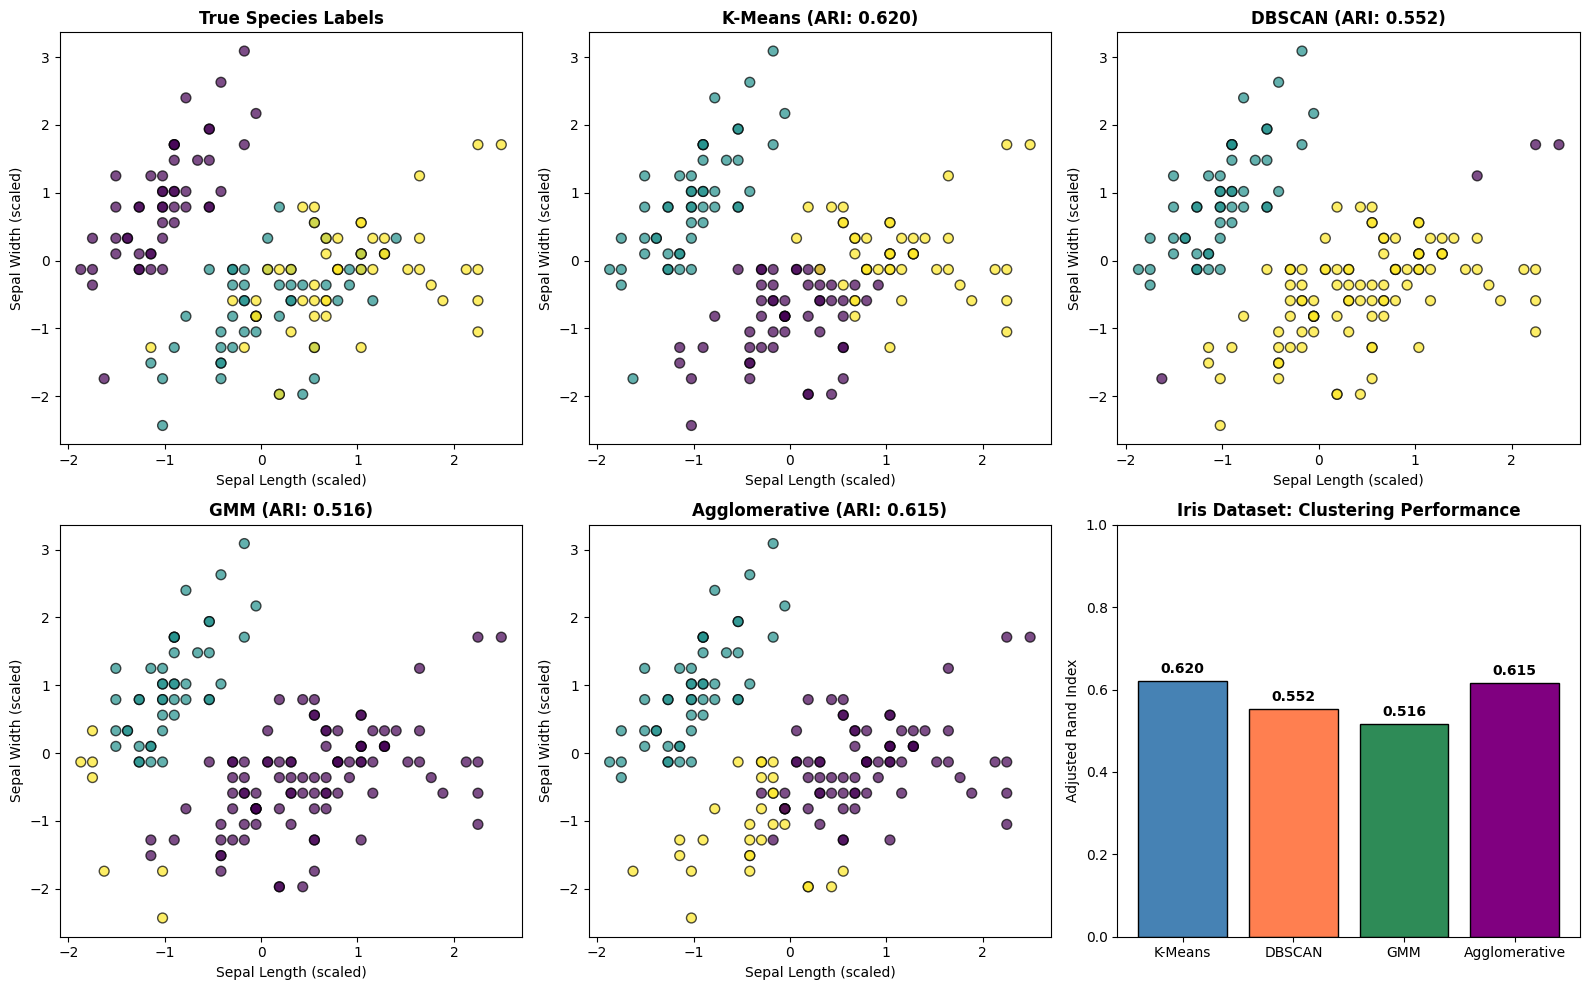

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [19]:
# Apply clustering algorithms to Iris dataset
# K-Means
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_iris_labels = kmeans_iris.fit_predict(X_iris_scaled)

# DBSCAN
dbscan_iris = DBSCAN(eps=0.8, min_samples=5)
dbscan_iris_labels = dbscan_iris.fit_predict(X_iris_scaled)

# GMM
gmm_iris = GaussianMixture(n_components=3, random_state=42)
gmm_iris_labels = gmm_iris.fit_predict(X_iris_scaled)

# Agglomerative
agg_iris = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_iris_labels = agg_iris.fit_predict(X_iris_scaled)

# Visualize results (using first 2 features for 2D visualization)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# True Labels
axes[0, 0].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=y_iris, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
axes[0, 0].set_title('True Species Labels', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Sepal Length (scaled)')
axes[0, 0].set_ylabel('Sepal Width (scaled)')

# K-Means
axes[0, 1].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=kmeans_iris_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
axes[0, 1].set_title(f'K-Means (ARI: {adjusted_rand_score(y_iris, kmeans_iris_labels):.3f})', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Sepal Length (scaled)')
axes[0, 1].set_ylabel('Sepal Width (scaled)')

# DBSCAN
axes[0, 2].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=dbscan_iris_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
axes[0, 2].set_title(f'DBSCAN (ARI: {adjusted_rand_score(y_iris, dbscan_iris_labels):.3f})', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Sepal Length (scaled)')
axes[0, 2].set_ylabel('Sepal Width (scaled)')

# GMM
axes[1, 0].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=gmm_iris_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
axes[1, 0].set_title(f'GMM (ARI: {adjusted_rand_score(y_iris, gmm_iris_labels):.3f})', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Sepal Length (scaled)')
axes[1, 0].set_ylabel('Sepal Width (scaled)')

# Agglomerative
axes[1, 1].scatter(X_iris_scaled[:, 0], X_iris_scaled[:, 1], c=agg_iris_labels, cmap='viridis', s=50, alpha=0.7, edgecolors='black')
axes[1, 1].set_title(f'Agglomerative (ARI: {adjusted_rand_score(y_iris, agg_iris_labels):.3f})', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Sepal Length (scaled)')
axes[1, 1].set_ylabel('Sepal Width (scaled)')

# Performance comparison
methods = ['K-Means', 'DBSCAN', 'GMM', 'Agglomerative']
aris_iris = [
    adjusted_rand_score(y_iris, kmeans_iris_labels),
    adjusted_rand_score(y_iris, dbscan_iris_labels),
    adjusted_rand_score(y_iris, gmm_iris_labels),
    adjusted_rand_score(y_iris, agg_iris_labels)
]
colors = ['steelblue', 'coral', 'seagreen', 'purple']
axes[1, 2].bar(methods, aris_iris, color=colors, edgecolor='black')
axes[1, 2].set_ylabel('Adjusted Rand Index')
axes[1, 2].set_title('Iris Dataset: Clustering Performance', fontsize=12, fontweight='bold')
axes[1, 2].set_ylim(0, 1)
for i, v in enumerate(aris_iris):
    axes[1, 2].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

---
## Part 6: Cluster Validation Metrics

### Intrinsic (Internal) Validation
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to other clusters. Range: [-1, 1]. Higher is better.

### Extrinsic (External) Validation  
- **Adjusted Rand Index (ARI)**: Measures similarity between clustering and ground truth labels. Range: [-1, 1]. Higher is better.

In [20]:
# Detailed validation metrics for Iris dataset
from sklearn.metrics import (silhouette_score, calinski_harabasz_score,
                             davies_bouldin_score, adjusted_rand_score,
                             normalized_mutual_info_score, fowlkes_mallows_score)

def evaluate_clustering(X, labels, true_labels, method_name):
    """Evaluate clustering using multiple metrics"""
    results = {'Method': method_name}

    # Intrinsic metrics (don't need true labels)
    if len(set(labels)) > 1 and -1 not in labels:  # Need at least 2 clusters, no noise
        results['Silhouette'] = silhouette_score(X, labels)
        results['Calinski-Harabasz'] = calinski_harabasz_score(X, labels)
        results['Davies-Bouldin'] = davies_bouldin_score(X, labels)
    else:
        results['Silhouette'] = 'N/A'
        results['Calinski-Harabasz'] = 'N/A'
        results['Davies-Bouldin'] = 'N/A'

    # Extrinsic metrics (need true labels)
    results['Adjusted Rand Index'] = adjusted_rand_score(true_labels, labels)
    results['Normalized Mutual Info'] = normalized_mutual_info_score(true_labels, labels)
    results['Fowlkes-Mallows'] = fowlkes_mallows_score(true_labels, labels)

    return results

# Evaluate all methods on Iris dataset
evaluation_results = []
evaluation_results.append(evaluate_clustering(X_iris_scaled, kmeans_iris_labels, y_iris, 'K-Means'))
evaluation_results.append(evaluate_clustering(X_iris_scaled, dbscan_iris_labels, y_iris, 'DBSCAN'))
evaluation_results.append(evaluate_clustering(X_iris_scaled, gmm_iris_labels, y_iris, 'GMM'))
evaluation_results.append(evaluate_clustering(X_iris_scaled, agg_iris_labels, y_iris, 'Agglomerative'))

df_evaluation = pd.DataFrame(evaluation_results)
print("=" * 100)
print("COMPREHENSIVE CLUSTER VALIDATION METRICS (Iris Dataset)")
print("=" * 100)
print("\nINTRINSIC METRICS (Higher Silhouette & Calinski-Harabasz, Lower Davies-Bouldin is better)")
print("EXTRINSIC METRICS (Higher is better, range 0-1)")
print()
df_evaluation

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

COMPREHENSIVE CLUSTER VALIDATION METRICS (Iris Dataset)

INTRINSIC METRICS (Higher Silhouette & Calinski-Harabasz, Lower Davies-Bouldin is better)
EXTRINSIC METRICS (Higher is better, range 0-1)



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Method Silhouette Calinski-Harabasz Davies-Bouldin  \
0        K-Means   0.459948        241.904402       0.833595   
1         DBSCAN        N/A               N/A            N/A   
2            GMM   0.475143        141.231476       0.886715   
3  Agglomerative   0.446689        222.719164       0.803467   

   Adjusted Rand Index  Normalized Mutual Info  Fowlkes-Mallows  
0             0.620135                0.659487         0.745211  
1             0.551755                0.689979         0.752388  
2             0.516459                0.657094         0.728740  
3             0.615323                0.675470         0.749782

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

---
## Conclusions and Key Takeaways

### Association Rule Mining
- **Apriori algorithm** efficiently finds frequent itemsets and generates association rules
- Key metrics: **Support** (frequency), **Confidence** (reliability), **Lift** (strength)
- Useful for market basket analysis, recommendation systems

### Clustering Methods
| Method | Best For | Key Parameters |
|--------|----------|----------------|
| **K-Means** | Large datasets, spherical clusters | K (number of clusters) |
| **K-Medoids** | Data with outliers | K (number of clusters) |
| **DBSCAN** | Arbitrary shapes, noisy data | eps, min_samples |
| **GMM (EM)** | Soft clustering, probabilistic | n_components |
| **Agglomerative** | Hierarchical structure, dendrogram | n_clusters, linkage |

### Validation Metrics
- **Intrinsic**: Silhouette Score, Calinski-Harabasz Index, Davies-Bouldin Index
- **Extrinsic**: Adjusted Rand Index, Normalized Mutual Information

### Lab Outcomes Achieved ✓
1. ✅ Implemented Apriori algorithm using mlxtend
2. ✅ Applied K-means and DBSCAN on datasets
3. ✅ Visualized and validated clustering results
4. ✅ Compared multiple clustering algorithms
5. ✅ Applied techniques to real-world Iris dataset